<a href="https://colab.research.google.com/github/Poornachandra77/Data-Science-and-Engineering-Tools/blob/main/ML_Data_Cleaning_and_Feature_Selection_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment No 1: ML Data Cleaning and Feature Selection_Assignment**

**Data Set** 

The data set consists of :

1. 


12 physical characteristics of abalones i.e. 

 1.   stay_up_late             
 2.   pressure_level          
 3.   coffee_consumed           
 4.   brain_working_duration    
 5.   school_assesssment       
 6.   stress_level             
 7.   shampoo_brand            
 8.   swimming                
 9.  hair_washing             
 10.  hair_grease             
 11.  dandruff                 
 12.  libido  
 

 
2. hair_loss - The dependent variable

3. There are a total of 401 observations.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from matplotlib import pyplot

In [255]:
dataFrame = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Luke_hair_loss_documentation.csv")

In [256]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hair_loss               400 non-null    object 
 1   stay_up_late            400 non-null    int64  
 2   pressure_level          400 non-null    object 
 3   coffee_consumed         400 non-null    int64  
 4   brain_working_duration  400 non-null    int64  
 5   school_assesssment      400 non-null    object 
 6   stress_level            400 non-null    object 
 7   shampoo_brand           400 non-null    object 
 8   swimming                400 non-null    object 
 9   hair_washing            400 non-null    object 
 10  hair_grease             396 non-null    float64
 11  dandruff                400 non-null    object 
 12  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 40.8+ KB


In [ ]:
#What are the data types? (Only numeric and categorical)
#There are 2 types : Numerical and Categorical
#Numerical - stay_up_late, coffee_consumed, brain_working_duration, hair_grease,libido
#Categorical- pressure_level, school_assesssment, stress_level, shampoo_brand, swimming, hair_washing, dandruff

In [ ]:
dataFrame.head(100)

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,Few,2,Low,0,1,None,Low,Pantene,No,Y,3.0,None,1
1,Few,0,Low,0,3,None,Low,Pantene,No,N,1.0,None,1
2,Medium,3,Low,1,0,None,Low,Pantene,Yes,Y,2.0,None,2
3,Few,2,Low,0,1,None,Low,Pantene,No,N,3.0,None,3
4,Few,2,Low,0,1,None,Low,Pantene,No,Y,1.0,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Medium,2,Medium,0,3,None,Medium,Hair & Shoulder,No,Y,3.0,None,5
96,Medium,3,High,3,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0
97,Medium,2,High,4,7,Team ass,High,Hair & Shoulder,No,Y,4.0,Few,0
98,Many,2,High,4,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0


In [ ]:
##Are there missing values?
#data is missing from the column hair_grease column, which means it is  required to impute or remove the null values from the data 
dataFrame.isna().sum()

hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               4
dandruff                  0
libido                    0
dtype: int64

In [ ]:
#Which independent variables have missing data? How much? 
#The independent variable hair_grease has missing data and the total umber of missing data is 4

In [ ]:
#https://www.youtube.com/watch?v=fYhr8eF1ubo Reference for imputation techniques
#Used the mean replacement technique as the missing values were not correlated and were less in number
#also we could have used dropping values imputation technique as the missing values were only 4 and it wouldn't have impacted the data but it is not the best approach
imputed_data = dataFrame.fillna(dataFrame.mean())
imputed_data.head(100)

<ipython-input-195-065a8c729d17>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  imputed_data = dataFrame.fillna(dataFrame.mean())


,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,Few,2,Low,0,1,None,Low,Pantene,No,Y,3.0,None,1
1,Few,0,Low,0,3,None,Low,Pantene,No,N,1.0,None,1
2,Medium,3,Low,1,0,None,Low,Pantene,Yes,Y,2.0,None,2
3,Few,2,Low,0,1,None,Low,Pantene,No,N,3.0,None,3
4,Few,2,Low,0,1,None,Low,Pantene,No,Y,1.0,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Medium,2,Medium,0,3,None,Medium,Hair & Shoulder,No,Y,3.0,None,5
96,Medium,3,High,3,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0
97,Medium,2,High,4,7,Team ass,High,Hair & Shoulder,No,Y,4.0,Few,0
98,Many,2,High,4,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0


In [ ]:
#mean replacement imputation technique
imputed_data.isna().sum()

hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               0
dandruff                  0
libido                    0
dtype: int64

In [ ]:
#Replaced categorical value with numerical values as it will be easier to plot qqplots and make assumptions

imputed_data['dandruff'].replace('None',0,inplace=True)
imputed_data['dandruff'].replace('Few',1,inplace=True)
imputed_data['dandruff'].replace('Many',2, inplace=True)

imputed_data['hair_loss'].replace("Few", 0, inplace=True)
imputed_data['hair_loss'].replace("Medium", 2, inplace=True)
imputed_data['hair_loss'].replace("Many", 2, inplace=True)
imputed_data['hair_loss'].replace("A lot", 3, inplace=True)

imputed_data['swimming'].replace('Yes', 1, inplace=True)
imputed_data['swimming'].replace('No', 0, inplace=True)

imputed_data.replace('Low', 0, inplace=True)
imputed_data.replace('Medium', 1, inplace=True)
imputed_data.replace('High', 2, inplace=True)
imputed_data.replace('Very High', 3, inplace=True)

imputed_data.head(100)

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,0,2,0,0,1,None,0,Pantene,0,Y,3.0,0,1
1,0,0,0,0,3,None,0,Pantene,0,N,1.0,0,1
2,2,3,0,1,0,None,0,Pantene,1,Y,2.0,0,2
3,0,2,0,0,1,None,0,Pantene,0,N,3.0,0,3
4,0,2,0,0,1,None,0,Pantene,0,Y,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2,1,0,3,None,1,Hair & Shoulder,0,Y,3.0,0,5
96,2,3,2,3,7,Team ass,2,Hair & Shoulder,0,N,4.0,1,0
97,2,2,2,4,7,Team ass,2,Hair & Shoulder,0,Y,4.0,1,0
98,2,2,2,4,7,Team ass,2,Hair & Shoulder,0,N,4.0,1,0


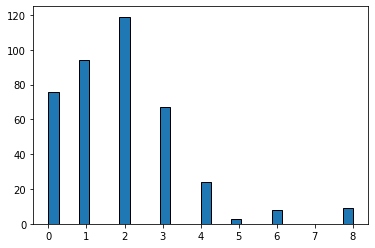

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


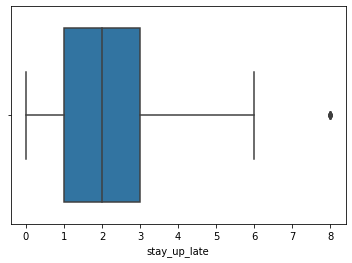

In [ ]:
#What are the likely distributions of the numeric variables?
plt.hist(imputed_data.stay_up_late, bins=30, edgecolor='black')
plt.show()
sns.boxplot(imputed_data.stay_up_late)
plt.show()

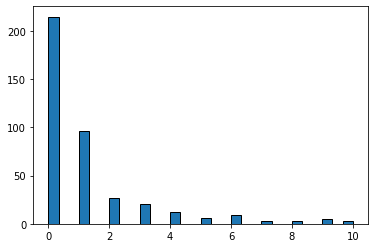

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


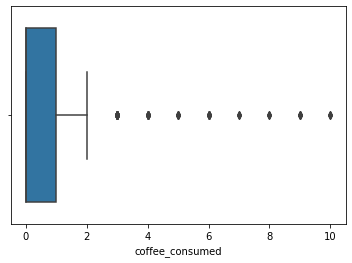

In [ ]:
plt.hist(imputed_data.coffee_consumed, bins=30, edgecolor='black')
plt.show()
sns.boxplot(imputed_data.coffee_consumed)
plt.show()

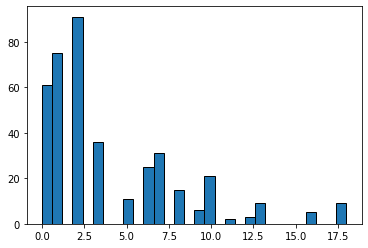

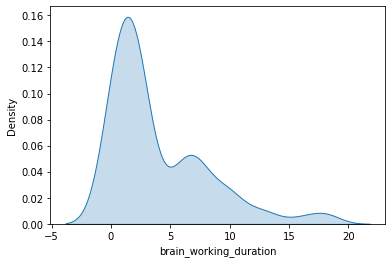

In [ ]:
plt.hist(imputed_data.brain_working_duration, bins=30, edgecolor='black')
plt.show()
sns.kdeplot(imputed_data.brain_working_duration, shade=True)
plt.show()

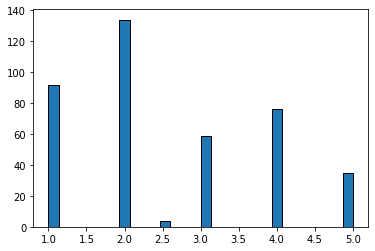

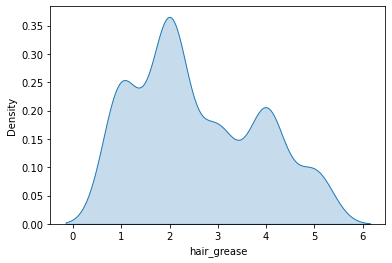

In [ ]:
plt.hist(imputed_data.hair_grease, bins=30, edgecolor='black')
plt.show()
sns.kdeplot(imputed_data.hair_grease, shade=True)
plt.show()

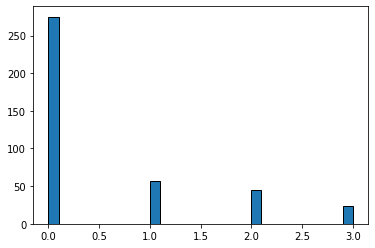

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


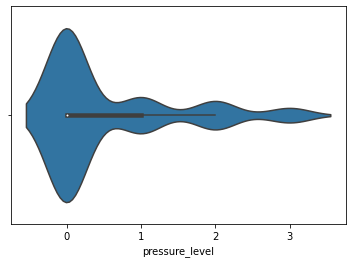

In [ ]:
plt.hist(imputed_data.pressure_level, bins=30, edgecolor='black')
plt.show()
sns.violinplot(imputed_data.pressure_level, shade=True)
plt.show()

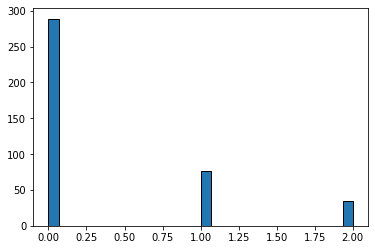

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


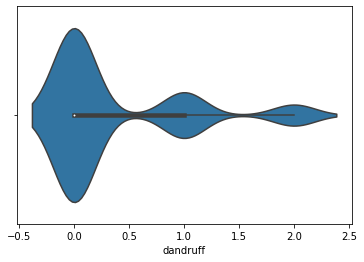

In [ ]:
plt.hist(imputed_data.dandruff, bins=30, edgecolor='black')
plt.show()
sns.violinplot(imputed_data.dandruff, shade=True)
plt.show()

<Figure size 576x360 with 0 Axes>

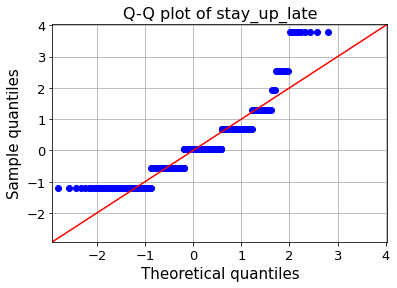

<Figure size 576x360 with 0 Axes>

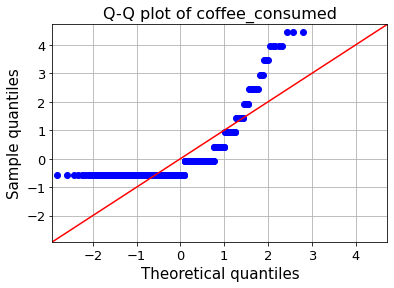

<Figure size 576x360 with 0 Axes>

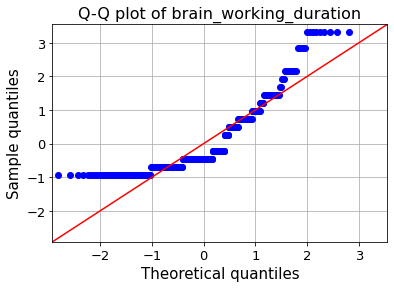

<Figure size 576x360 with 0 Axes>

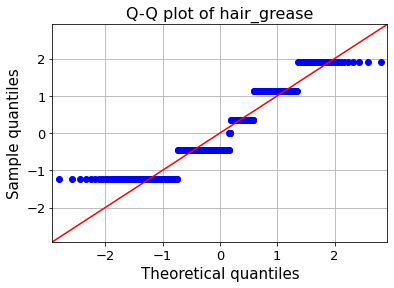

<Figure size 576x360 with 0 Axes>

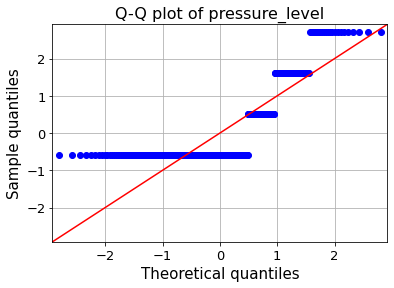

<Figure size 576x360 with 0 Axes>

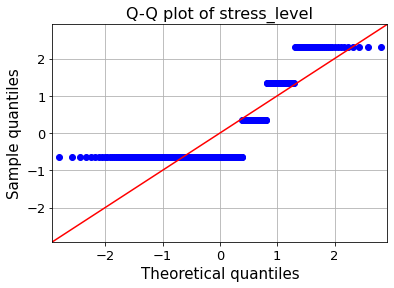

<Figure size 576x360 with 0 Axes>

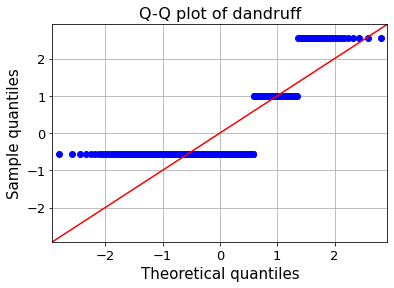

In [ ]:
from statsmodels.graphics.gofplots import qqplot
independent_data=imputed_data[['stay_up_late','coffee_consumed', 'brain_working_duration', 'hair_grease','pressure_level','stress_level','dandruff' ]]
for c in independent_data.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(independent_data[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()



1. Looking at the Q-Q plot above, it appears that some independent variables are roughly following normal distribution and has a lot of outliers present as the number of data is less.  
2.   There are many outliers in few of the predictor variables like in dandruff, stress level and coffee consumed etc.






In [ ]:
#* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
imputed_data.corr()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_grease,dandruff,libido
hair_loss,1.000000,0.349901,0.497609,0.518949,0.420956,0.524020,-0.103581,0.505263,0.523293,0.425367
stay_up_late,0.349901,1.000000,0.508844,0.718017,0.603039,0.352284,-0.127301,0.439185,0.477551,-0.061987
pressure_level,0.497609,0.508844,1.000000,0.826228,0.797197,0.889836,-0.269659,0.829852,0.919271,0.066658
coffee_consumed,0.518949,0.718017,0.826228,1.000000,0.847582,0.725233,-0.147065,0.680236,0.811721,0.036706
brain_working_duration,0.420956,0.603039,0.797197,0.847582,1.000000,0.726903,-0.228026,0.717837,0.809451,-0.083707
stress_level,0.524020,0.352284,0.889836,0.725233,0.726903,1.000000,-0.312828,0.747642,0.868707,0.045168
swimming,-0.103581,-0.127301,-0.269659,-0.147065,-0.228026,-0.312828,1.000000,-0.278167,-0.259308,0.087026
hair_grease,0.505263,0.439185,0.829852,0.680236,0.717837,0.747642,-0.278167,1.000000,0.863648,0.059235
dandruff,0.523293,0.477551,0.919271,0.811721,0.809451,0.868707,-0.259308,0.863648,1.000000,0.062513
libido,0.425367,-0.061987,0.066658,0.036706,-0.083707,0.045168,0.087026,0.059235,0.062513,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

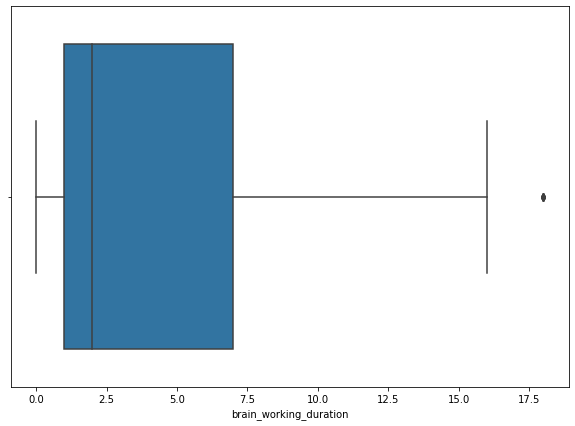

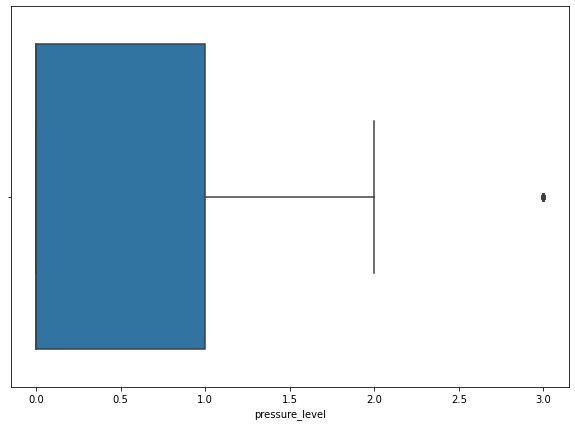

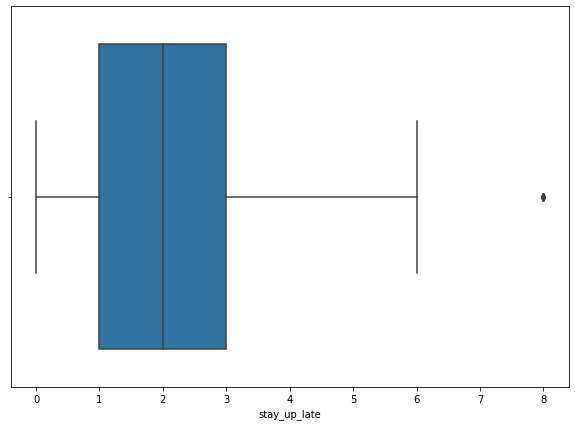

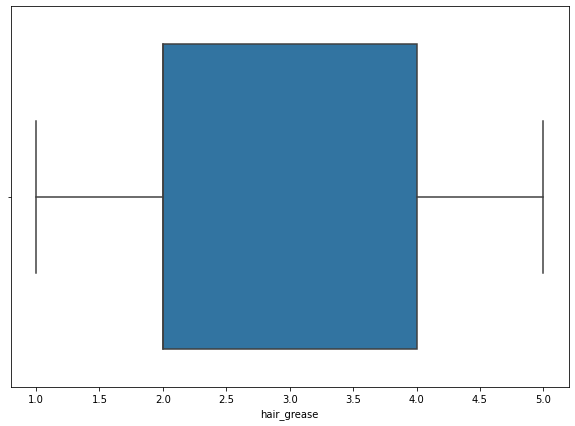

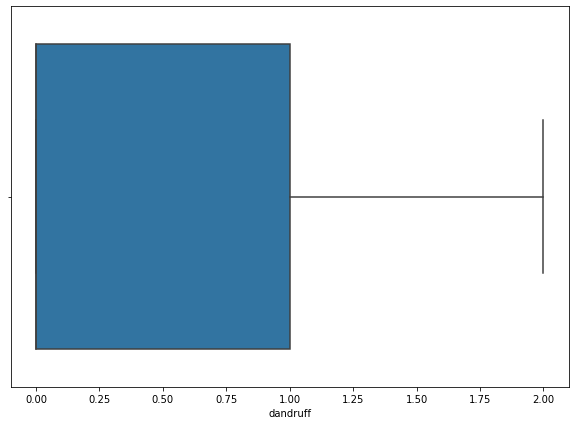

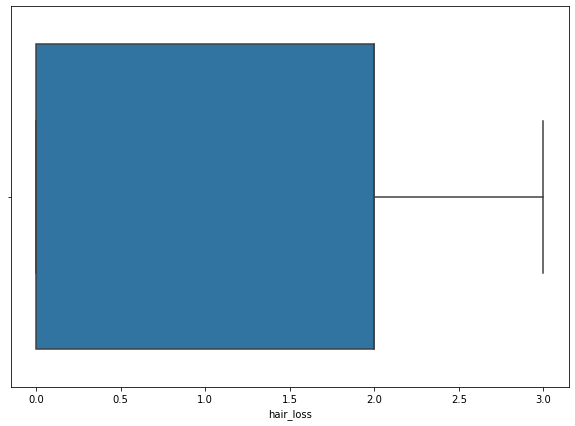

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['brain_working_duration'])
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['pressure_level'])
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['stay_up_late'])
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['hair_grease'])
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['dandruff'])
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['hair_loss'])


It is clear to visualize and interpret the data. Looking at the boxplot above, we can infer below:
1. Brain Working Duration, Coffee Consumed,Pressure Level,Stay Up Late are having few outliers. Few people have greater Brain Working Duration, coffee consumption, different pressure level, staying up late.
2. Few independent variables are very close to zero like person having coffee, people having no pressure, people having no dandruff etc.
3. For other variables like Dandruff, Hair Grease, Stay Up Late, Brain Working duration it looks like most of the values lies in between of the respective ranges of the variables.



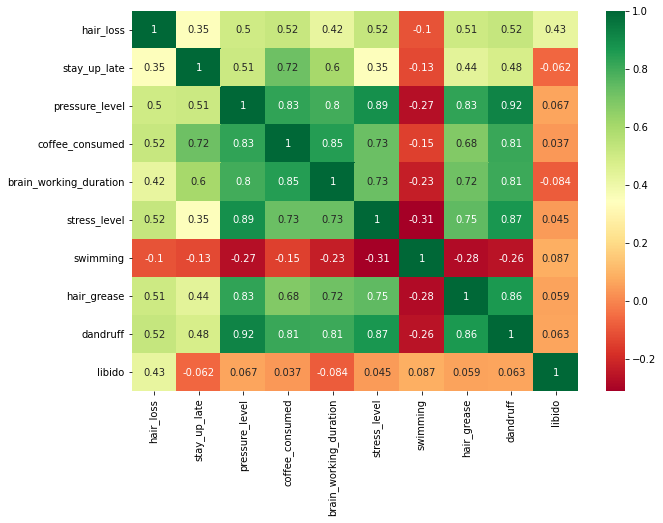

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(imputed_data.corr(), annot=True, cmap='RdYlGn')

Correlation matrix and heatmap shows that there is multicollinearity between the independent variables. Highest correlation is between Pressure Level and Dandruff.



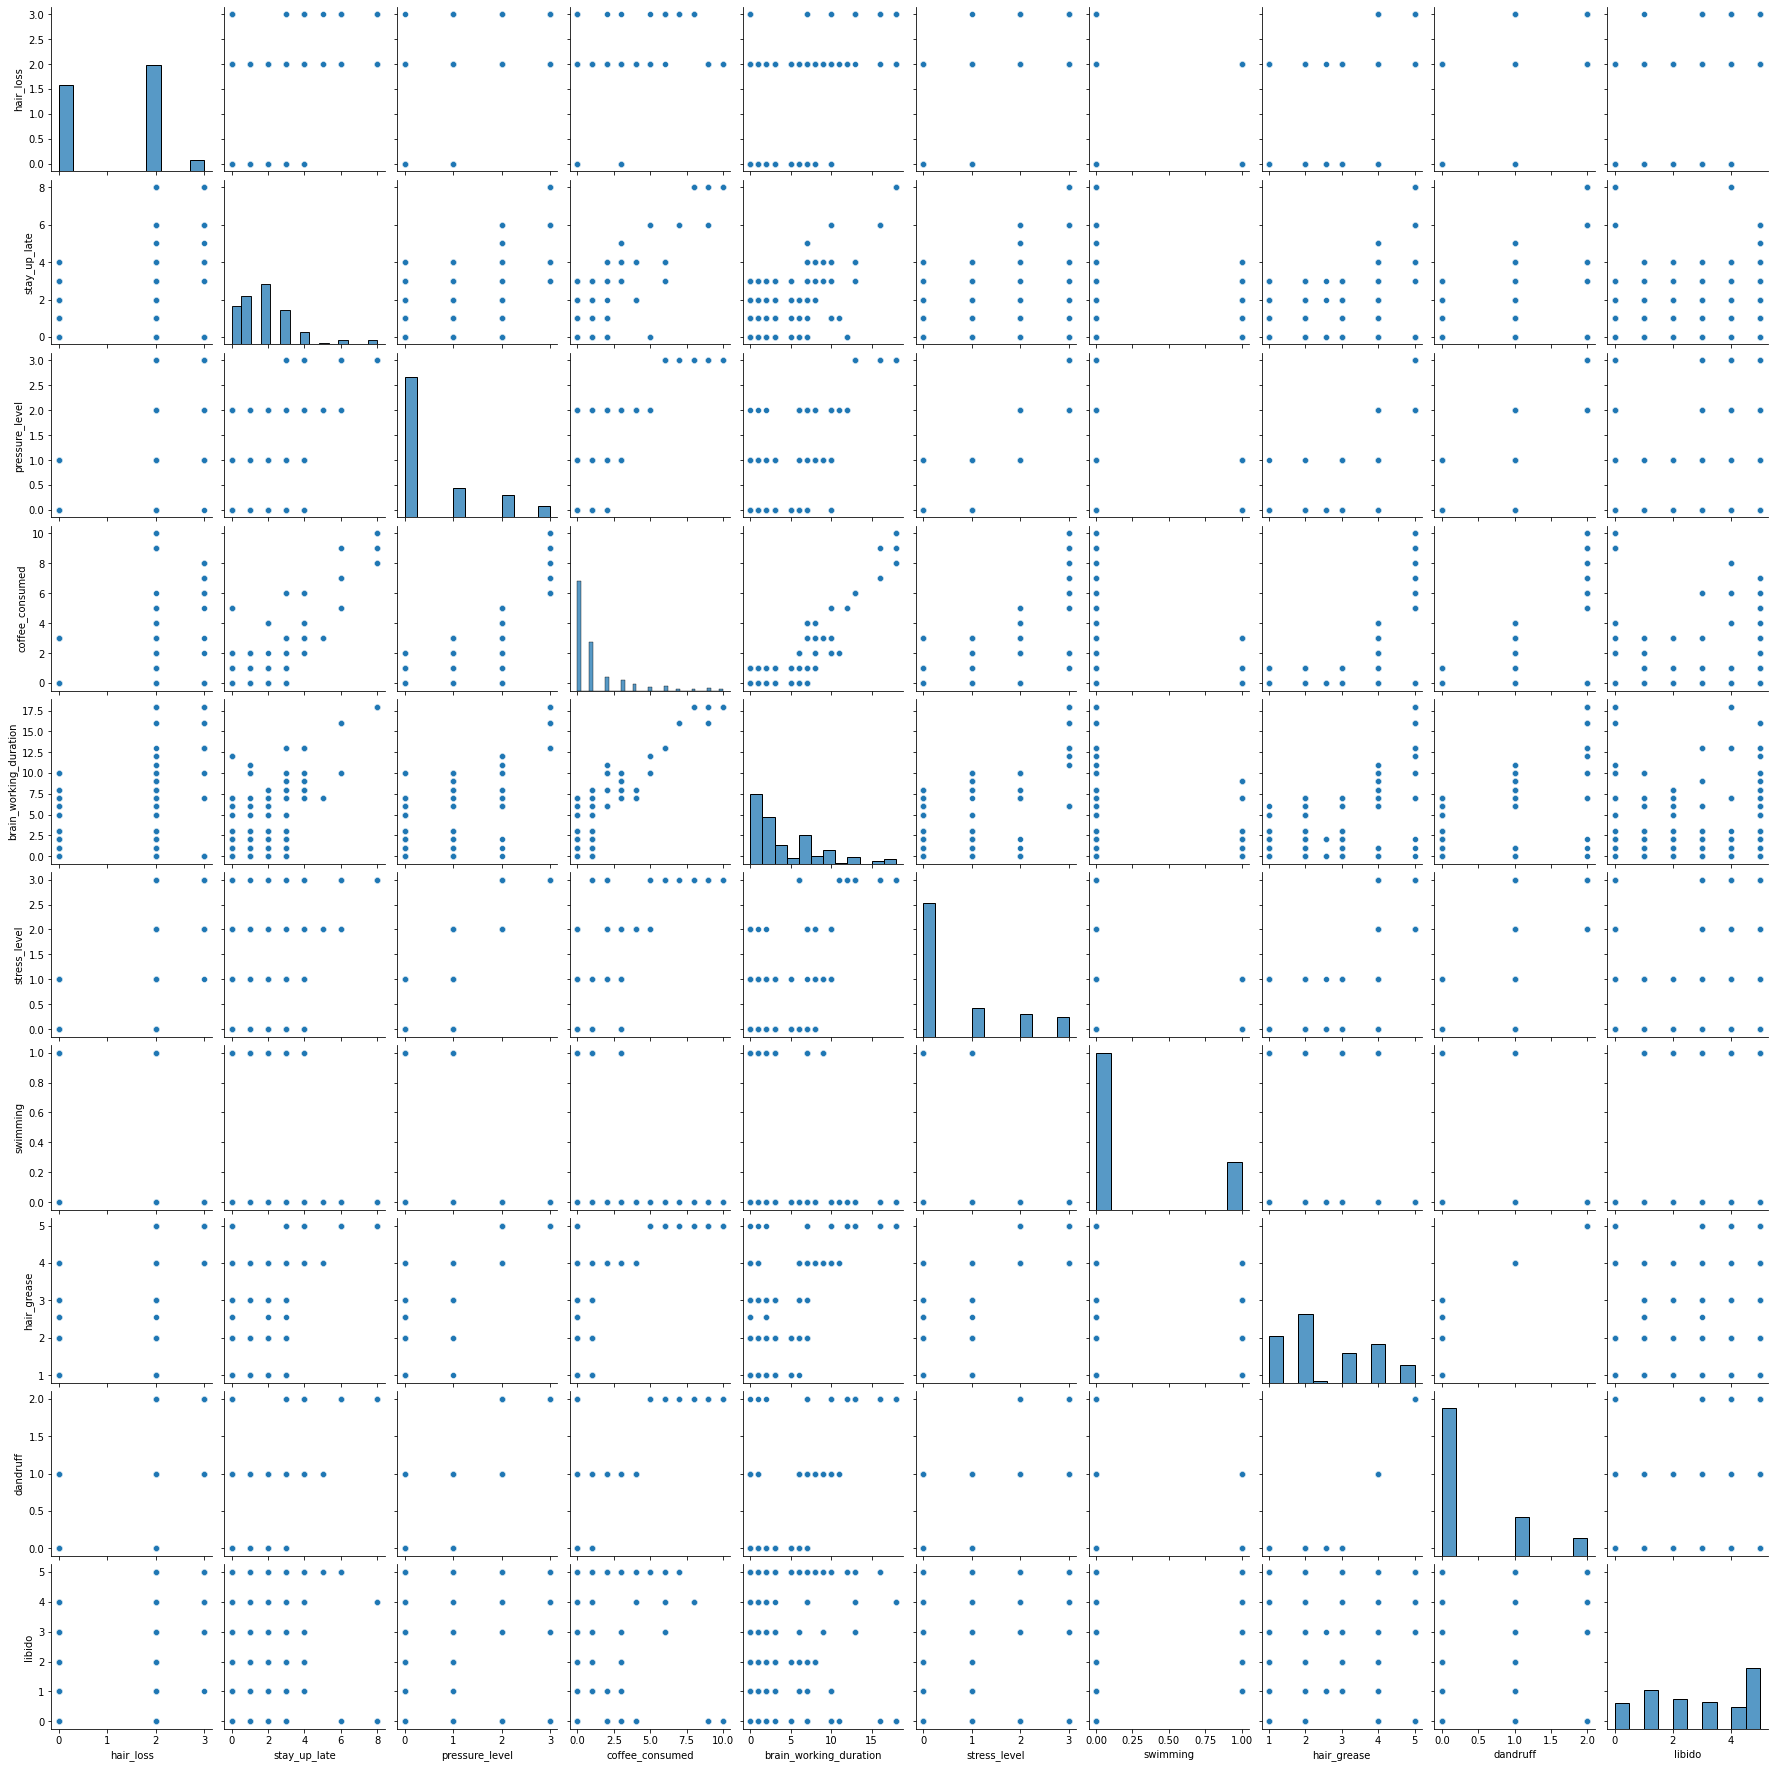

In [ ]:
sns.pairplot(imputed_data) 

In [ ]:
#In the predictor variables independent of all the other predictor variables?
#No, they are not independent of each other. There is multi - collinearity among lot of the independent variable which is shown by the correlation table and pairplot map


#Or else we can take correlation matrix
corr_matrix = imputed_data.corr()
corr_coefs = corr_matrix['hair_loss']                 #correlation against target variable
sorted_corr_coefs = corr_coefs.sort_values(ascending=False)
print(sorted_corr_coefs)
 

hair_loss                 1.000000
stress_level              0.524020
dandruff                  0.523293
coffee_consumed           0.518949
hair_grease               0.505263
pressure_level            0.497609
libido                    0.425367
brain_working_duration    0.420956
stay_up_late              0.349901
swimming                 -0.103581
Name: hair_loss, dtype: float64


* Which predictor variables are the most important?


Dandruff , Stress Level , Pressure Level , Hair Grease, Coffee Consumed are the top five independent variables that have strong correlation with Hair Loss

 

*   Predictor significance can be identified by the correlation analysis and also other two methods called variance importance and model selection





In [ ]:
#References:- https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830
# training_data = imputed_data.sample(frac=0.8, random_state=25)
# testing_data = imputed_data.drop(training_data.index)

# print(f"No. of training examples: {training_data.shape[0]}")
# print(f"No. of testing examples: {testing_data.shape[0]}")

In [ ]:
import statsmodels.api as sm

model = sm.OLS(imputed_data['hair_loss'], imputed_data[ ['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
       'libido', 'brain_working_duration', 'stay_up_late', 'swimming']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              hair_loss   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              161.0
Date:                Sat, 04 Feb 2023   Prob (F-statistic):                   1.34e-125
Time:                        22:36:21   Log-Likelihood:                         -447.80
No. Observations:                 400   AIC:                                      913.6
Df Residuals:                     391   BIC:                                      949.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
stress_level               0.4601      0.087      5.276      0.000       0.289       0.631
dandruff                   0.2065      0.173      1.193      0.234      -0.134       0.547
coffee_consumed            0.1741      0.050      3.468      0.001       0.075       0.273
hair_grease                0.1205      0.043      2.816      0.005       0.036       0.205
pressure_level            -0.4612      0.129     -3.582      0.000      -0.714      -0.208
libido                     0.2124      0.020     10.807      0.000       0.174       0.251
brain_working_duration    -0.0308      0.019     -1.646      0.101      -0.068       0.006
stay_up_late               0.0703      0.035      1.994      0.047       0.001       0.140
swimming                  -0.0278      0.093     -0.300      0.764      -0.210       0.154
==============================================================================
Omnibus:                       88.081   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.943
Skew:                           0.198   Prob(JB):                     4.67e-05
Kurtosis:                       1.981   Cond. No.                         37.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Swimming seems to be the least significant as it has the highest p value and Stress Level, Pressure Level and Libido has the lowest p value so they are the most significant



In [ ]:
from sklearn.model_selection import  train_test_split

X = imputed_data[ ['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
       'libido', 'brain_working_duration', 'stay_up_late', 'swimming']]

y = imputed_data['hair_loss']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

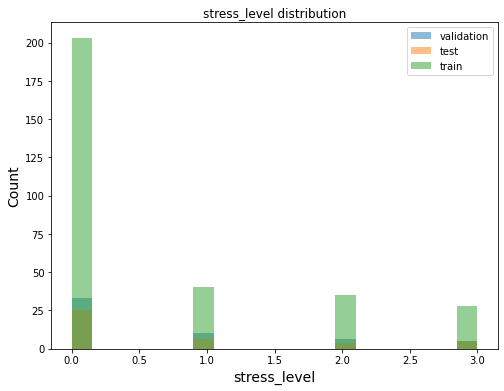

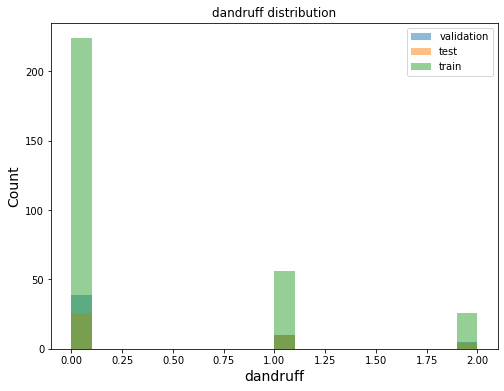

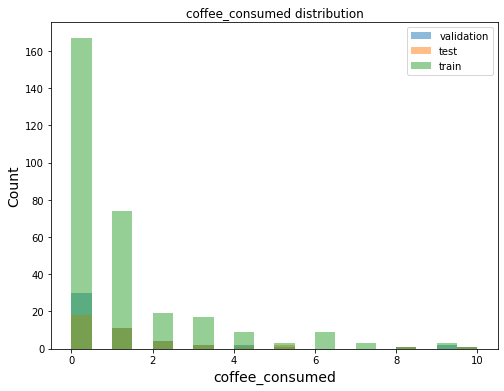

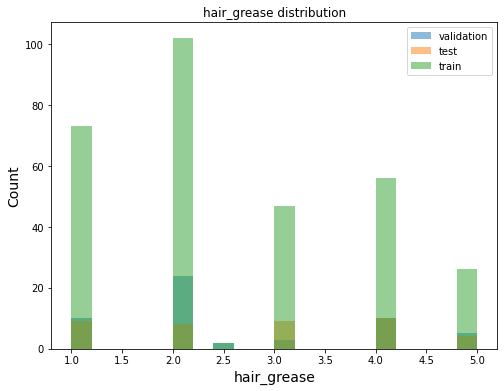

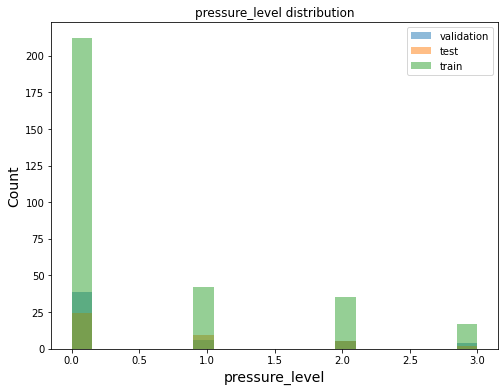

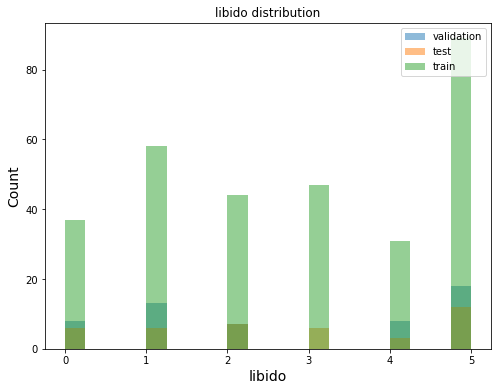

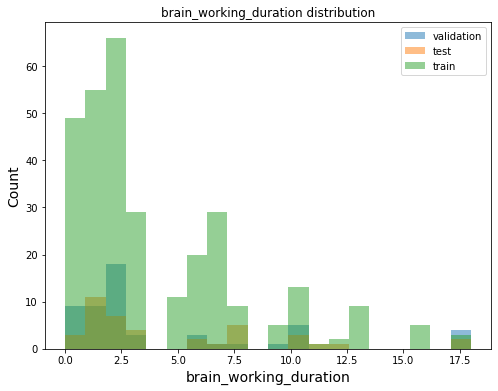

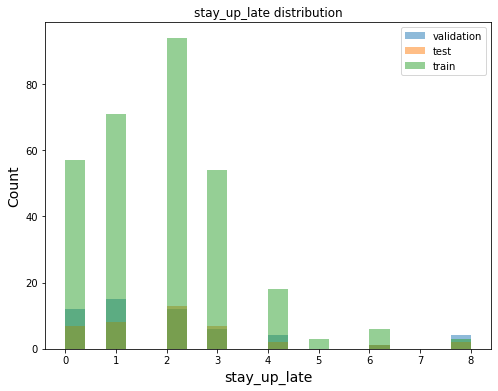

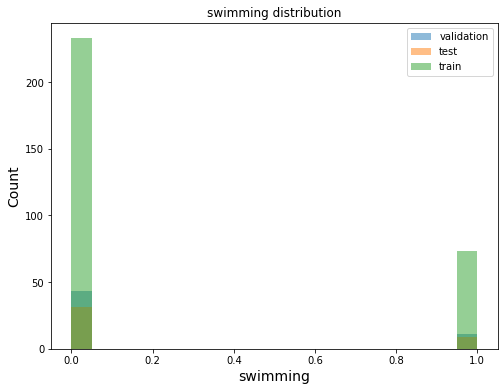

In [ ]:
X_test_plot = X_test[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
       'libido', 'brain_working_duration', 'stay_up_late', 'swimming']]

X_val_plot = X_val[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
       'libido', 'brain_working_duration', 'stay_up_late', 'swimming']]

X_train_plot = X_train[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
       'libido', 'brain_working_duration', 'stay_up_late', 'swimming']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [ ]:
#Do the training and test sets have the same data?
#The data is same but the ratio is Training 76.5%, Validation set 13.5% and Test set 10% i.e training data is more than the testing data and validation data

X_test_plot.equals(X_train_plot)

False

1.   Few Boundary Values in Staying up Late, Coffee Consumed, School assesment parameters which appears to be missing in testing data
2. No missing values in libido , dandruff, hair grease, hair washing etc.
3. Except from these all values are in testing and training data

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.54
Coefficient of determination: 0.53
R^2 score on training set = 0.5311267534484023


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.42
Coefficient of determination: 0.59
R^2 score on test set = 0.5854811711760746


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.69
Coefficient of determination: 0.35
R^2 score on validation set = 0.35308776598902336


In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.7036 ± 0.1643,stress_level
0.5961 ± 0.2603,pressure_level
0.3465 ± 0.1746,libido
0.1496 ± 0.1657,hair_grease
0.1362 ± 0.1161,coffee_consumed
0.1330 ± 0.1093,stay_up_late
0.0399 ± 0.0314,brain_working_duration
0.0017 ± 0.0097,swimming
-0.0038 ± 0.0264,dandruff


The permutation importance is also aligned with the P values where swimming seems to be the lease significant value and rest are significant. Stress Level, Libido and Pressure level are the three most significant.

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# Remove 1% of data randomly

df_1 = imputed_data[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease']].sample(frac=0.99, random_state=1)
df_1.reset_index(drop=True, inplace=True)

# Remove 5% of data randomly
df_5 = imputed_data[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease']].sample(frac=0.95, random_state=5)
df_5.reset_index(drop=True, inplace=True)

# Remove 10% of data randomly
df_10 = imputed_data[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease']].sample(frac=0.9, random_state=10)
df_10.reset_index(drop=True, inplace=True)

In [ ]:
# Create a function to perform imputation
def impute_df(df, imputer):
    X = df.copy()
    X_cols = X.columns
    X = X.values
    X = imputer.fit_transform(X)
    X = pd.DataFrame(X, columns=X_cols)
    return X

# Impute the values using SimpleImputer
simple_imputer = SimpleImputer(strategy='mean')
df_1_imp = impute_df(df_1, simple_imputer)
df_5_imp = impute_df(df_5, simple_imputer)
df_10_imp = impute_df(df_10, simple_imputer)

# Impute the values using KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_1_imp_knn = impute_df(df_1, knn_imputer)
df_5_imp_knn = impute_df(df_5, knn_imputer)
df_10_imp_knn = impute_df(df_10, knn_imputer)

# Impute the values using IterativeImputer
iter_imputer = IterativeImputer(max_iter=10, random_state=0)
df_1_imp_iter = impute_df(df_1, iter_imputer)
df_5_imp_iter = impute_df(df_5, iter_imputer)
df_10_imp_iter = impute_df(df_10, iter_imputer)

In [ ]:
# Calculate the percentage error for each imputed dataframe
def calc_error(df_imp, df_orig):
    error = np.zeros_like(df_imp)

    for i in range(df_imp.shape[0]):
        for j in range(df_imp.shape[1]):
            if df_orig.iloc[i, j] != 0:
                error[i, j] = np.abs((df_imp.iloc[i, j] - df_orig.iloc[i, j]) / df_orig.iloc[i, j])
            else:
                error[i, j] = 0

    error_mean = error.mean().mean()
    return error_mean

error_1_simple = calc_error(df_1_imp, imputed_data)
error_5_simple = calc_error(df_5_imp, imputed_data)
error_10_simple = calc_error(df_10_imp, imputed_data)

error_1_knn = calc_error(df_1_imp_knn, imputed_data)
error_5_knn = calc_error(df_5_imp_knn, imputed_data)
error_10_knn = calc_error(df_10_imp_knn, imputed_data)

error_1_iter = calc_error(df_1_imp_iter, imputed_data)
error_5_iter = calc_error(df_5_imp_iter, imputed_data)
error_10_iter = calc_error(df_10_imp_iter, imputed_data)

cols_to_search = ['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease']

df_imp = df_1_imp[cols_to_search]
df_orig = imputed_data[cols_to_search]
error_1_simple = calc_error(df_imp, df_orig)

df_imp = df_5_imp[cols_to_search]
df_orig = imputed_data[cols_to_search]
error_5_simple = calc_error(df_imp, df_orig)

df_imp = df_10_imp[cols_to_search]
df_orig = imputed_data[cols_to_search]
error_10_simple = calc_error(df_imp, df_orig)

df_imp = df_1_imp_knn[cols_to_search]
df_orig = imputed_data[cols_to_search]
error_1_knn = calc_error(df_imp, df_orig)

df_imp = df_5_imp_knn[cols_to_search]
df_orig = imputed_data[cols_to_search]
error_5_knn = calc_error(df_imp, df_orig)

df_imp = df_10_imp_knn[cols_to_search]
df_orig = imputed_data[cols_to_search]
error_10_knn = calc_error(df_imp, df_orig)

df_imp = df_1_imp_iter[cols_to_search]
df_orig = imputed_data[cols_to_search]
error_1_iter = calc_error(df_imp, df_orig)

df_imp = df_5_imp_iter[cols_to_search]
df_orig = imputed_data[cols_to_search]
error_5_iter = calc_error(df_imp, df_orig)

df_imp = df_10_imp_iter[cols_to_search]
df_orig = imputed_data[cols_to_search]
error_10_iter = calc_error(df_imp, df_orig)

print("Simple Imputer Error:")
print("Error for 1% data:", error_1_simple)
print("Error for 5% data:", error_5_simple)
print("Error for 10% data:", error_10_simple)

print("KNN Imputer Error:")
print("Error for 1% data:", error_1_simple)
print("Error for 5% data:", error_5_simple)
print("Error for 10% data:", error_10_simple)

print("Iterative Imputer Error:")
print("Error for 1% data:", error_1_iter)
print("Error for 5% data:", error_5_iter)
print("Error for 10% data:", error_10_iter)


Simple Imputer Error:
Error for 1% data: 0.477161620903046
Error for 5% data: 0.4528931312438616
Error for 10% data: 0.45557598157185325
KNN Imputer Error:
Error for 1% data: 0.477161620903046
Error for 5% data: 0.4528931312438616
Error for 10% data: 0.45557598157185325
Iterative Imputer Error:
Error for 1% data: 0.477161620903046
Error for 5% data: 0.4528931312438616
Error for 10% data: 0.45557598157185325



**Answer the following questions**

**1. Which independent variables are useful to predict a target (dependent variable)?**

A: Below is the rank of the independent variables

*   hair_loss                   
*   stress_level                                  
*   dandruff
*   coffee_consumed
*   hair_grease                                          
*   pressure_level            
*   libido
* brain_working_duration                                          
*   stay_up_late            
*   swimming


**2.   Which independent variables have missing data? How much?**

A: The independent variable hair_grease has missing data and the total umber of missing data is 4


**3. Do the training and test sets have the same data?**

A: The data is same but the ratio is Training 76.5%, Validation set 13.5% and Test set 10% i.e training data is more than the testing data and validation data



**4. In the predictor variables independent of all the other predictor variables?**

A: No, they are not independent of each other. There is multi - collinearity among lot of the independent variable which is shown by the correlation table and pairplot map


**5. Which predictor variables are the most important?**

A:

Swimming seems to be the least significant as it has the highest p value and Stress Level, Pressure Level and Libido has the lowest p value so they are the most significant

*   hair_loss                   
*   stress_level                                  
*   dandruff
*   coffee_consumed
*   hair_grease                                          
*   pressure_level            
*   libido
* brain_working_duration                                          
*   stay_up_late            
*   swimming

**6. Do the ranges of the predictor variables make sense?**

A:

*   Brain Working Duration, Coffee Consumed,Pressure Level,Stay Up Late are having few outliers. Few people have greater Brain Working Duration, coffee consumption, different pressure level, staying up late.
*   For other variables like Dandruff, Hair Grease, Stay Up Late, Brain Working duration it looks like most of the values lies in between of the respective ranges of the variables.
*   Few independent variables are very close to zero like person having coffee, people having no pressure, people having no dandruff etc.


**7. What are the distributions of the predictor variables?**

A:
1. Looking at the Q-Q plot above, it appears that some independent variables are roughly following normal distribution and has a lot of outliers present as the number of data is less.  
2.   There are many outliers in few of the predictor variables like in dandruff, stress level and coffee consumed etc.

**References**
1. Towards Data Science (https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830
)
2.Sckit learn offcial documentation
3.Reference for imputation techniques (https://www.youtube.com/watch?v=fYhr8eF1ubo)
4. Eli5 official documentation
5. Kaggle data imputation techniques for outliers (https://www.kaggle.com/code/residentmario/simple-techniques-for-missing-data-imputation/notebook)
6. Reference from Aiskunks database (https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb)

**Thank You**
